In [83]:
import os
import pandas as pd
import numpy as np
import seaborn as sns 
from model_utils import * 

from sklearn.metrics import confusion_matrix

from sklearn.utils.class_weight import compute_class_weight
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.feature_selection import mutual_info_classif


In [98]:

file_in = 'data/test_prod_set_all_raw.csv'
df = pd.read_csv(file_in)
df.head()

,Unnamed: 0,observation_id,Type,Gender,Age range,Officer-defined ethnicity,Legislation,Object of search,station,Latitude,...,outcome,outcome_updated,proba,valid,year,month,day,day_of_week,hour,minute
0,0,de68812b-e014-47b4-9c55-c4caf5e8060d,person search,male,over 34,white,misuse of drugs act 1971 (section 23),controlled drugs,nottinghamshire,None,...,False,False,0.513441,True,2020,7,30,3,15,16
1,1,467c4766-3a3f-489d-bf09-5a698748499e,person search,male,10-17,black,misuse of drugs act 1971 (section 23),controlled drugs,city-of-london,51.512598,...,False,True,0.559085,True,2020,1,1,2,5,8
2,2,c6d2de91-445e-40f7-9e5f-9d572f8bb232,person search,male,10-17,black,misuse of drugs act 1971 (section 23),controlled drugs,city-of-london,51.512598,...,False,True,0.559085,True,2020,1,1,2,5,10
3,3,72acf630-b42b-474c-bce1-90ec5cdd244f,person search,male,10-17,black,misuse of drugs act 1971 (section 23),controlled drugs,city-of-london,51.512598,...,False,True,0.559085,True,2020,1,1,2,5,26
4,4,85bbc8b3-7963-4165-a8cf-df3bb1cc5ed3,person search,male,18-24,asian,police and criminal evidence act 1984 (section 1),offensive weapons,city-of-london,51.512745,...,False,True,0.377021,True,2020,1,1,2,5,32


In [107]:
(df["Latitude"]=='None').sum()/df.shape[0]

0.5678309288787649

Text(0, 0.5, '# of searches per station')

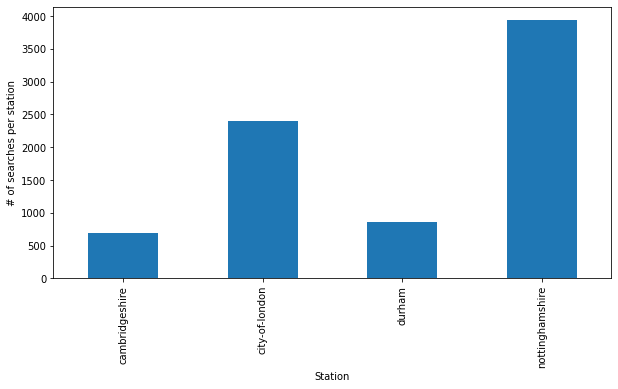

In [85]:
plt.rcParams["figure.figsize"]=[10,5]
object_search=df["station"].value_counts()
object_search=object_search.sort_index()
object_search.plot.bar()
plt.xlabel("Station")
plt.ylabel("# of searches per station")




Text(0, 0.5, '# of searches per year')

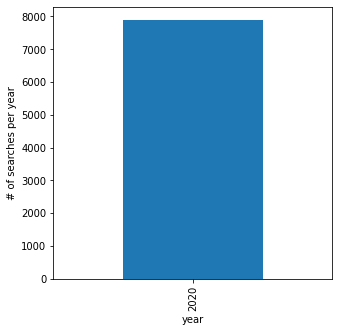

In [86]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["year"].value_counts()
object_search=object_search.sort_index()
object_search.plot.bar()
plt.xlabel("year")
plt.ylabel("# of searches per year")

/home/ppribeir/dev/private/LDSSA/projects/batch4-workspace/batch4-capstone/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


Text(0, 0.5, 'Age range')

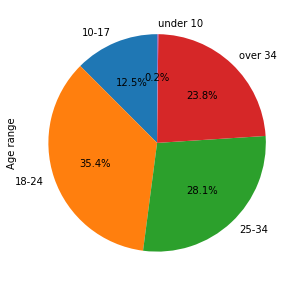

In [89]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Age range"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.1f%%',startangle=90)
plt.ylabel("Age range")

Text(0, 0.5, 'Gender')

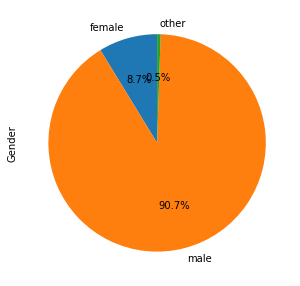

In [88]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Gender"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.1f%%',startangle=90)
plt.ylabel("Gender")

Text(0, 0.5, 'Officer-defined ethnicity')

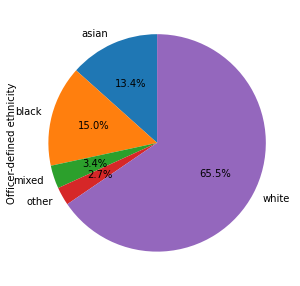

In [90]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Officer-defined ethnicity"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.1f%%',startangle=90)
plt.ylabel("Officer-defined ethnicity")

Text(0.5, 0, 'Search ratio per object of search')

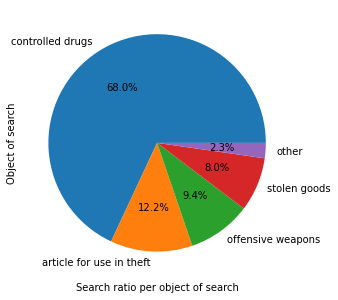

In [93]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Object of search"].value_counts()/df.shape[0]
object_low_search=object_search[object_search < 0.0095]
object_search=object_search.drop(index=object_low_search.index.to_list())

object_low_search_s=pd.Series([object_low_search.sum()],index=['other'])
object_search=object_search.append(object_low_search_s)
object_search.plot.pie(autopct='%1.1f%%')
plt.ylabel("Object of search")
plt.xlabel("Search ratio per object of search")



/home/ppribeir/dev/private/LDSSA/projects/batch4-workspace/batch4-capstone/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


Text(0.5, 0, 'Removal of more than just outer clothing')

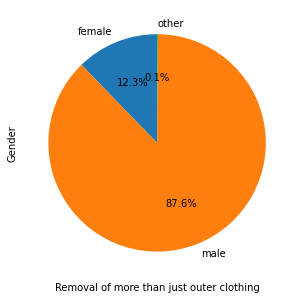

In [153]:
plt.rcParams["figure.figsize"]=[5,5]
df_cloth=df[df["Removal of more than just outer clothing"]]
object_search=df_cloth["Gender"].value_counts()/df_cloth.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.1f%%',startangle=90)
plt.ylabel("Gender")
plt.xlabel("Removal of more than just outer clothing")

Text(0, 0.5, 'Type of search')

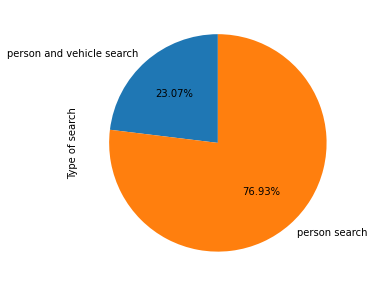

In [103]:


plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Type"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.2f%%',startangle=90)
plt.ylabel("Type of search")

/home/ppribeir/dev/private/LDSSA/projects/batch4-workspace/batch4-capstone/venv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


Text(0, 0.5, 'Part of a policing operation')

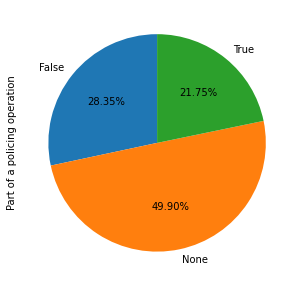

In [104]:
plt.rcParams["figure.figsize"]=[5,5]
object_search=df["Part of a policing operation"].value_counts()/df.shape[0]
object_search=object_search.sort_index()
object_search.plot.pie(autopct='%1.2f%%',startangle=90)
plt.ylabel("Part of a policing operation")

In [ ]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df,title='report')
profile.to_file("profile_report.html")

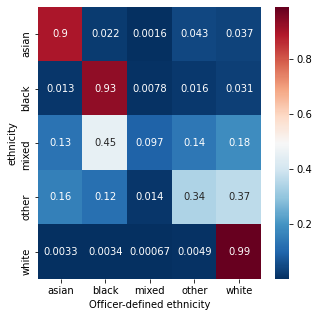

In [166]:

#df_["Self-defined ethnicity"]=df_["ethnicity"]
crosstab_1 = pd.crosstab(df_["ethnicity"], df_["Officer-defined ethnicity"],normalize='index')

#crosstab_1=crosstab_1/df.shape[0]
crosstab_1
sns.heatmap(crosstab_1, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); #